# 기본 준비

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#시각화시 한글이 안 깨지게 폰트 설정하기
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

plt.rc('font', family = 'Malgun Gothic')
plt.rc('axes', unicode_minus=False)

set_matplotlib_formats('retina')

%matplotlib inline

# 데이터 불러오기

In [3]:
df = pd.read_csv('소상공인시장진흥공단_상가업소정보_의료기관_201909.csv', low_memory = False)
df.shape

(91335, 39)

# 데이터 확인하기

In [4]:
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4,NaN,127.053198,37.488742
2,20152277,조정현신경외과의원,NaN,S,의료,S01,병원,S01B15,신경외과,Q86201,...,4139013200117400001017064,한라프라자,경기도 시흥시 중심상가로 178,429450.0,15066.0,NaN,NaN,NaN,126.734841,37.344955
3,20350610,한귀원정신과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,2650010400100740001009932,NaN,부산광역시 수영구 수영로 688,613100.0,48266.0,NaN,5,NaN,129.115438,35.166872
4,20364049,더블유스토어수지점,수지점,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4146510100107120002026238,NaN,경기도 용인시 수지구 문정로 32,448170.0,16837.0,NaN,1,NaN,127.095522,37.323528


In [6]:
#컬럼 명을 모두 볼 수 있다.
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [12]:
df['상권업종중분류명'].value_counts()

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [15]:
df['시도명'].value_counts()

경기도        21374
서울특별시      18943
부산광역시       6473
경상남도        4973
인천광역시       4722
대구광역시       4597
경상북도        4141
전라북도        3894
충청남도        3578
전라남도        3224
광주광역시       3214
대전광역시       3067
충청북도        2677
강원도         2634
울산광역시       1997
제주특별자치도     1095
세종특별자치시      353
Name: 시도명, dtype: int64

# 결측치 처리하기

In [24]:
#각 컬럼에 따라 결측치의 개수를 표시한다.
df_null_count = df.isnull().sum()
df_null_count

상가업소번호           0
상호명              0
지점명          89989
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시도명            379
시군구코드          379
시군구명           379
행정동코드            0
행정동명           379
법정동코드           55
법정동명            55
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        19256
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        80731
건물관리번호           0
건물명          44882
도로명주소            0
구우편번호           12
신우편번호            2
동정보          83929
층정보          47291
호정보          75784
경도               0
위도               0
dtype: int64

In [25]:
#인덱스를 부여한다.
df_null_count = df_null_count.reset_index()
df_null_count

,index,0
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0
5,상권업종중분류코드,0
6,상권업종중분류명,0
7,상권업종소분류코드,0
8,상권업종소분류명,0
9,표준산업분류코드,4922


In [41]:
#어느 컬럼이 결측지 수가 가장 많은지 확인한다.
df_null_count = df_null_count.sort_values(by = 0, ascending = False)
df_null_count

,index,0
2,지점명,89989
34,동정보,83929
28,건물부번지,80731
36,호정보,75784
35,층정보,47291
30,건물명,44882
23,지번부번지,19256
9,표준산업분류코드,4922
10,표준산업분류명,4922
11,시도코드,379


In [42]:
#결측지가 존재하는 상위 18개를 선택한다.
df_null = df_null_count_sort.head(18)
df_null

,index,0
2,지점명,89989
34,동정보,83929
28,건물부번지,80731
36,호정보,75784
35,층정보,47291
30,건물명,44882
23,지번부번지,19256
9,표준산업분류코드,4922
10,표준산업분류명,4922
11,시도코드,379


In [45]:
#위에서 선택한 상위 18개의 컬럼명을 한 배열에 넣는다.
drop_columns = df_null['index'].values
drop_columns

array(['지점명', '동정보', '건물부번지', '호정보', '층정보', '건물명', '지번부번지', '표준산업분류코드',
       '표준산업분류명', '시도코드', '시군구코드', '시군구명', '행정동명', '시도명', '법정동코드', '법정동명',
       '구우편번호', '신우편번호'], dtype=object)

In [46]:
#결측치가 존재하는 컬럼을 삭제한다.
df.drop(columns=drop_columns, inplace=True)

In [48]:
df.columns

Index(['상가업소번호', '상호명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드', '상권업종중분류명',
       '상권업종소분류코드', '상권업종소분류명', '행정동코드', '지번코드', '대지구분코드', '대지구분명', '지번본번지',
       '지번주소', '도로명코드', '도로명', '건물본번지', '건물관리번호', '도로명주소', '경도', '위도'],
      dtype='object')

# 데이터 선택하기

In [51]:
#수원 선택하기
df_suwon = df[df['도로명주소'].str.startswith('경기도 수원')]
df_suwon.head()

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,행정동코드,지번코드,...,대지구분명,지번본번지,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,경도,위도
106,21971193,룡플란트치과수원점,S,의료,S01,병원,S01B04,치과의원,4111367000,4111313700209410005,...,대지,941,경기도 수원시 권선구 권선동 941-5,411132012008,경기도 수원시 권선구 경수대로,411,4111313700109410005022973,경기도 수원시 권선구 경수대로 411,127.024686,37.263242
302,24441774,위드아이소아청소년과의원,S,의료,S01,병원,S01B11,소아과,4111760000,4111710300213410004,...,대지,1341,경기도 수원시 영통구 이의동 1341-4,411173177033,경기도 수원시 영통구 에듀타운로,24,4111710300113410004000001,경기도 수원시 영통구 에듀타운로 24,127.052292,37.285209
310,19950291,수원서울외과,S,의료,S01,병원,S01B07,내과/외과,4111755000,4111710200200790010,...,대지,79,경기도 수원시 영통구 원천동 79-10,411172012012,경기도 수원시 영통구 중부대로,259,4111710200100790010000161,경기도 수원시 영통구 중부대로 259,127.044550,37.274983
321,19948581,함소아한의원,S,의료,S01,병원,S01B06,한의원,4111758000,4111710500209590004,...,대지,959,경기도 수원시 영통구 영통동 959-4,411173177007,경기도 수원시 영통구 봉영로,1587,4111710500109590004001218,경기도 수원시 영통구 봉영로 1587,127.072317,37.253316
358,20534546,신병원,S,의료,S01,병원,S01B08,정형/성형외과,4111355000,4111312800200450019,...,대지,45,경기도 수원시 권선구 고색동 45-19,411133012003,경기도 수원시 권선구 매송고색로,724,4111312800100450019035459,경기도 수원시 권선구 매송고색로 724,126.983707,37.251336


In [52]:
#각 업종이 얼마나 있는지 알아보기
df_suwon['상권업종중분류명'].value_counts()

병원          1612
약국/한약방       518
수의업          150
유사의료업         96
의료관련서비스업      29
Name: 상권업종중분류명, dtype: int64

In [54]:
df_suwon_hospital = df_suwon[
    df['상권업종중분류명'] =='병원'
]
df_suwon_hospital.head()

C:\Users\Navray\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,행정동코드,지번코드,...,대지구분명,지번본번지,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,경도,위도
106,21971193,룡플란트치과수원점,S,의료,S01,병원,S01B04,치과의원,4111367000,4111313700209410005,...,대지,941,경기도 수원시 권선구 권선동 941-5,411132012008,경기도 수원시 권선구 경수대로,411,4111313700109410005022973,경기도 수원시 권선구 경수대로 411,127.024686,37.263242
302,24441774,위드아이소아청소년과의원,S,의료,S01,병원,S01B11,소아과,4111760000,4111710300213410004,...,대지,1341,경기도 수원시 영통구 이의동 1341-4,411173177033,경기도 수원시 영통구 에듀타운로,24,4111710300113410004000001,경기도 수원시 영통구 에듀타운로 24,127.052292,37.285209
310,19950291,수원서울외과,S,의료,S01,병원,S01B07,내과/외과,4111755000,4111710200200790010,...,대지,79,경기도 수원시 영통구 원천동 79-10,411172012012,경기도 수원시 영통구 중부대로,259,4111710200100790010000161,경기도 수원시 영통구 중부대로 259,127.044550,37.274983
321,19948581,함소아한의원,S,의료,S01,병원,S01B06,한의원,4111758000,4111710500209590004,...,대지,959,경기도 수원시 영통구 영통동 959-4,411173177007,경기도 수원시 영통구 봉영로,1587,4111710500109590004001218,경기도 수원시 영통구 봉영로 1587,127.072317,37.253316
358,20534546,신병원,S,의료,S01,병원,S01B08,정형/성형외과,4111355000,4111312800200450019,...,대지,45,경기도 수원시 권선구 고색동 45-19,411133012003,경기도 수원시 권선구 매송고색로,724,4111312800100450019035459,경기도 수원시 권선구 매송고색로 724,126.983707,37.251336


In [62]:
#치과와 한의원이 많다는 것을 알 수 있다.
df_suwon_hospital['상권업종소분류명'].value_counts()

치과의원       397
한의원        359
내과/외과      233
기타병원       119
일반병원        92
소아과         90
정형/성형외과     72
피부과         49
이비인후과의원     43
산부인과        40
비뇨기과        36
안과의원        27
신경외과        20
노인/치매병원     13
치과병원         9
종합병원         9
한방병원         4
Name: 상권업종소분류명, dtype: int64

In [63]:
#치과와 한의원이 각각 24%, 22%를 차지한다는 것을 알 수 있다.
df_suwon_hospital['상권업종소분류명'].value_counts(normalize = True)

치과의원       0.246278
한의원        0.222705
내과/외과      0.144541
기타병원       0.073821
일반병원       0.057072
소아과        0.055831
정형/성형외과    0.044665
피부과        0.030397
이비인후과의원    0.026675
산부인과       0.024814
비뇨기과       0.022333
안과의원       0.016749
신경외과       0.012407
노인/치매병원    0.008065
치과병원       0.005583
종합병원       0.005583
한방병원       0.002481
Name: 상권업종소분류명, dtype: float64

# 그래프로 나타내기

<AxesSubplot:xlabel='경도', ylabel='위도'>

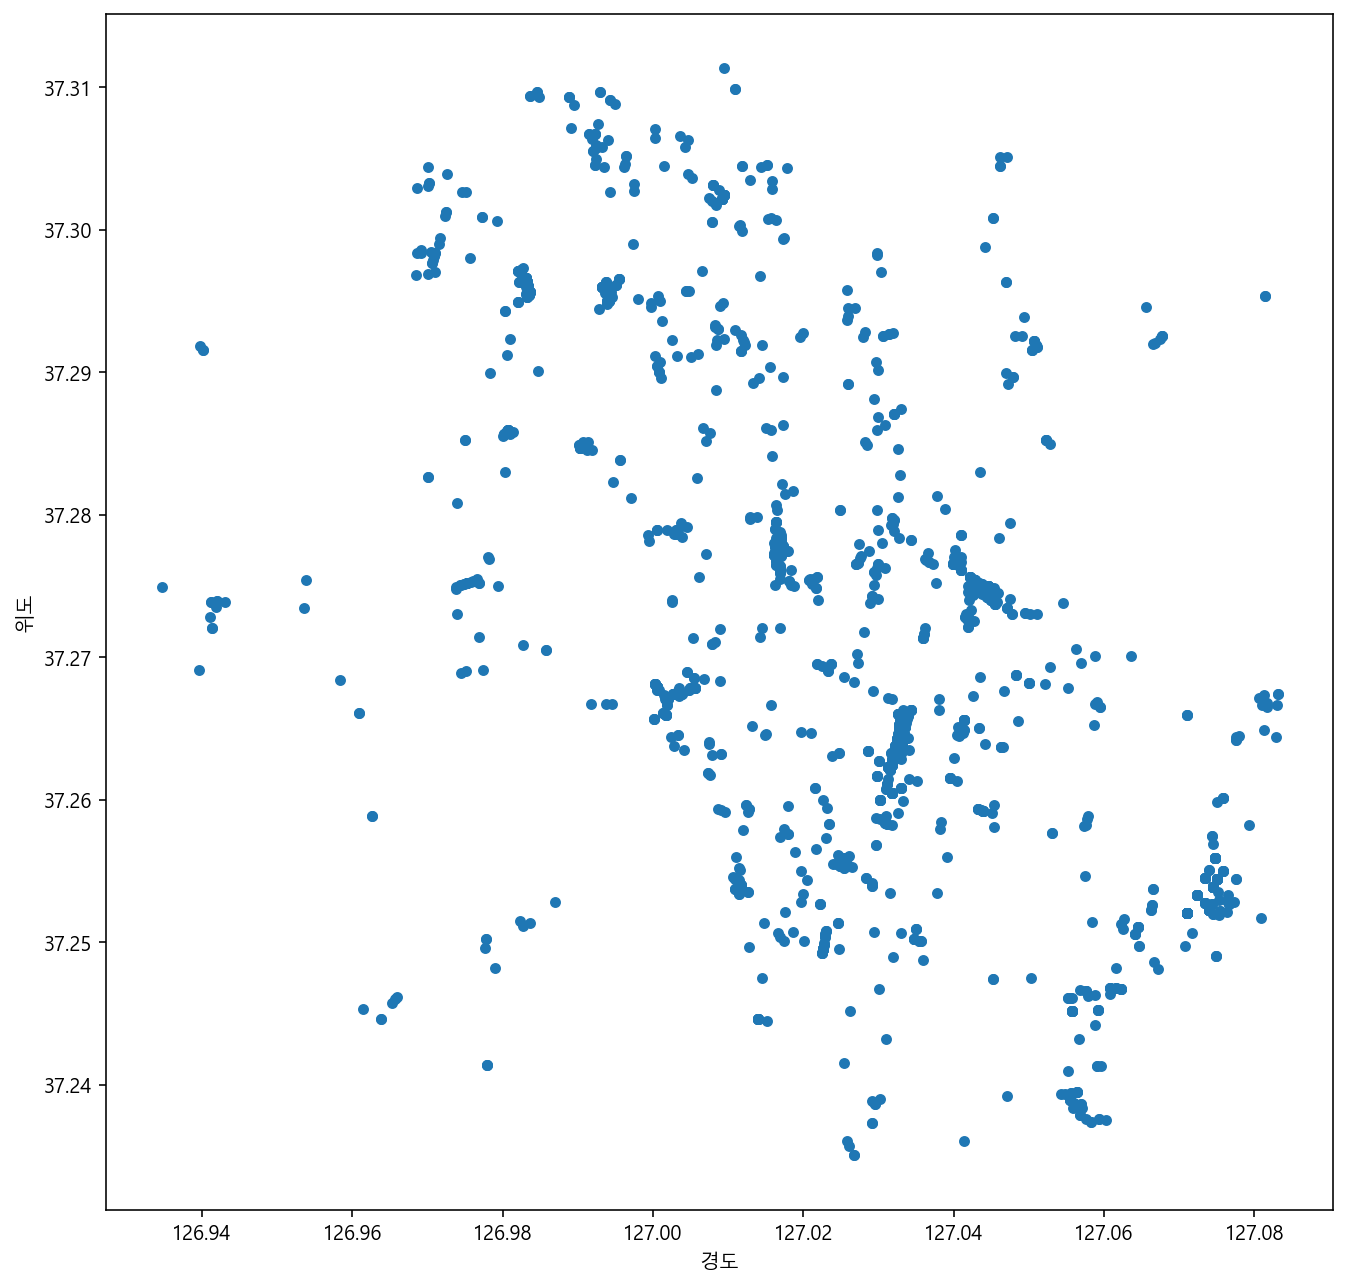

In [59]:
#수원에 병원이 어떻게 분포하고 있는지 확인한다.
df_suwon_hospital.plot.scatter(x = '경도', y = '위도', figsize = (11,11))

<AxesSubplot:xlabel='경도', ylabel='위도'>

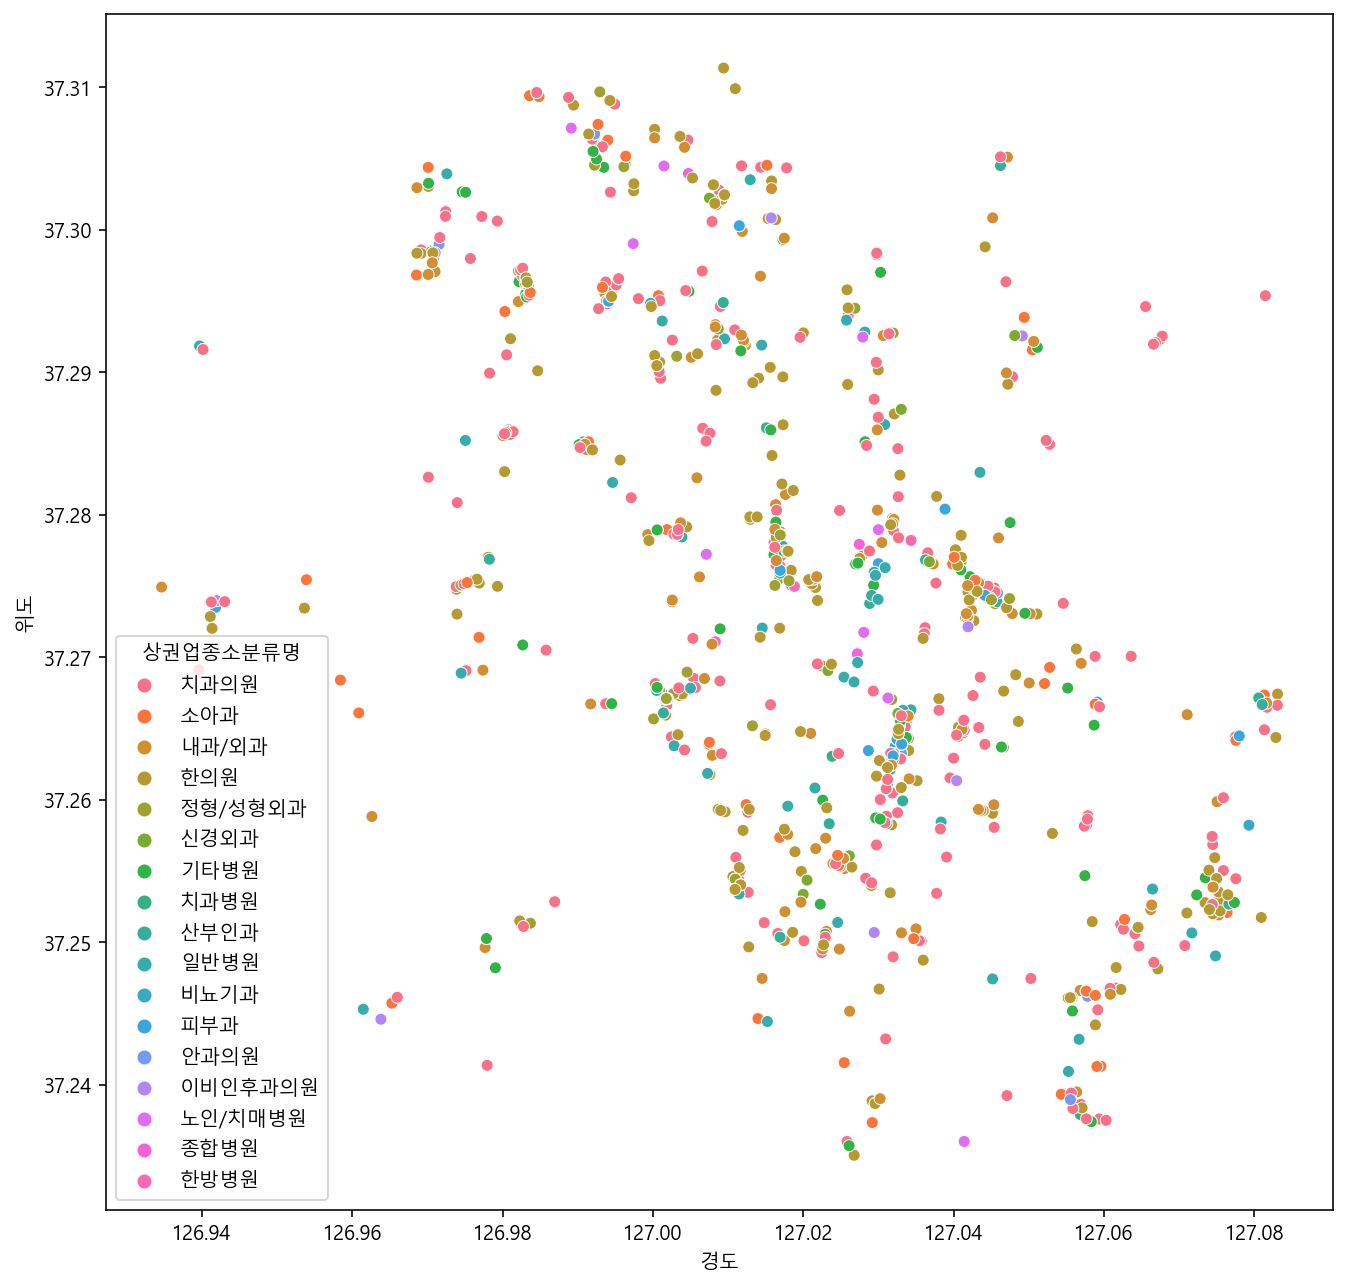

In [61]:
#수원에 어떤 병원이 어느 위치에 있는지를 나타낸다.
plt.figure(figsize = (11,11))
sns.scatterplot(
   data = df_suwon_hospital,
   x = '경도', 
   y = '위도',
   hue = '상권업종소분류명'
)

# folium 사용하기

In [64]:
import folium

In [65]:
df_suwon_hospital.head()

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,행정동코드,지번코드,...,대지구분명,지번본번지,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,경도,위도
106,21971193,룡플란트치과수원점,S,의료,S01,병원,S01B04,치과의원,4111367000,4111313700209410005,...,대지,941,경기도 수원시 권선구 권선동 941-5,411132012008,경기도 수원시 권선구 경수대로,411,4111313700109410005022973,경기도 수원시 권선구 경수대로 411,127.024686,37.263242
302,24441774,위드아이소아청소년과의원,S,의료,S01,병원,S01B11,소아과,4111760000,4111710300213410004,...,대지,1341,경기도 수원시 영통구 이의동 1341-4,411173177033,경기도 수원시 영통구 에듀타운로,24,4111710300113410004000001,경기도 수원시 영통구 에듀타운로 24,127.052292,37.285209
310,19950291,수원서울외과,S,의료,S01,병원,S01B07,내과/외과,4111755000,4111710200200790010,...,대지,79,경기도 수원시 영통구 원천동 79-10,411172012012,경기도 수원시 영통구 중부대로,259,4111710200100790010000161,경기도 수원시 영통구 중부대로 259,127.044550,37.274983
321,19948581,함소아한의원,S,의료,S01,병원,S01B06,한의원,4111758000,4111710500209590004,...,대지,959,경기도 수원시 영통구 영통동 959-4,411173177007,경기도 수원시 영통구 봉영로,1587,4111710500109590004001218,경기도 수원시 영통구 봉영로 1587,127.072317,37.253316
358,20534546,신병원,S,의료,S01,병원,S01B08,정형/성형외과,4111355000,4111312800200450019,...,대지,45,경기도 수원시 권선구 고색동 45-19,411133012003,경기도 수원시 권선구 매송고색로,724,4111312800100450019035459,경기도 수원시 권선구 매송고색로 724,126.983707,37.251336


In [78]:
#지도를 그린다.
x = df_suwon_hospital['위도'].mean()
y = df_suwon_hospital['경도'].mean()

m = folium.Map(location = [x,y],zoom_start=12)

In [80]:
#지도에 마커를 표시한다. 
for n in df_suwon_hospital.index :
    name = df_suwon_hospital.loc[n,'상호명']
    address = df_suwon_hospital.loc[n,'도로명주소']
    popup_name = f'{name} - {address}'
    x = df_suwon_hospital.loc[n, '위도']
    y = df_suwon_hospital.loc[n, '경도']
    location = [x,y]
    
    folium.Marker(
       location = location,
       popup = popup_name
    ).add_to(m)
m